<a href="https://colab.research.google.com/github/Subin-pds/Machine-Learning-Practice-Projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**     - Regression
##### **Contribution**     - Individual
##### **Submitted by**           - Subin

# **Project Summary**

# **GitHub Link**

#**Problem Statement**


# ***Let's Begin !***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from pandas.io.parsers.readers import read_csv
df = pd.read_excel('/content/drive/MyDrive/SeoulBikeData.xlsx')

In [5]:
df.head()

,Date,Rented Bike Count,Hour,False,Humidity(%),Wind speed (m/s),Visibility (10m),False.1,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.columns

Index([                   'Date',       'Rented Bike Count',
                          'Hour',                     False,
                   'Humidity(%)',        'Wind speed (m/s)',
              'Visibility (10m)',                 'False.1',
       'Solar Radiation (MJ/m2)',            'Rainfall(mm)',
                 'Snowfall (cm)',                 'Seasons',
                       'Holiday',         'Functioning Day'],
      dtype='object')

In [7]:
df.shape

(8760, 14)

In [8]:
df.describe()

,Rented Bike Count,Hour,False,Humidity(%),Wind speed (m/s),Visibility (10m),False.1,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df.head()

,Date,Rented Bike Count,Hour,False,Humidity(%),Wind speed (m/s),Visibility (10m),False.1,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
df.tail()

,Date,Rented Bike Count,Hour,False,Humidity(%),Wind speed (m/s),Visibility (10m),False.1,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Looking for Null values

In [11]:
#Column wise percentage of Null values
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

Date                       0.0
Rented Bike Count          0.0
Hour                       0.0
False                      0.0
Humidity(%)                0.0
Wind speed (m/s)           0.0
Visibility (10m)           0.0
False.1                    0.0
Solar Radiation (MJ/m2)    0.0
Rainfall(mm)               0.0
Snowfall (cm)              0.0
Seasons                    0.0
Holiday                    0.0
Functioning Day            0.0
dtype: float64

In [12]:
#Row-wise distribution of null values
round((df.isnull().sum(axis=1)/len(df))*100, 2).sort_values(ascending=False)

0       0.0
5842    0.0
5836    0.0
5837    0.0
5838    0.0
       ... 
2914    0.0
2913    0.0
2912    0.0
2911    0.0
8759    0.0
Length: 8760, dtype: float64

# Data Cleaning

In [13]:
#Renaming the column named 'False' & 'False.1' into 'Temperature' & 'Dew Point Temperature' respectively
df = df.rename(columns={False: 'Temperature', 'False.1': 'Dew Point Temperature'})


In [ ]:
#Looking into the distinct values and their count for each column in the dataset.
for col in df:
  print(df[col].value_counts(ascending=False),'\n\n\n')

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64 



0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64 



0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64 



 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature, Length: 546, dtype: int64 



53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Leng

# Extracing the Month from the date
Our aim is to predict the rented bike count in the future from the past data. Here we can train the model by using the past month rental history so we can predict the future rented bike count in the respective months. So here we are extracting the month from the date and assign to a new column.

In [14]:
from pandas.core.interchange.dataframe_protocol import Column
#Convering the 'date' column into data_time format
df['Date']= pd.to_datetime(df['Date'])

#Extracting the month from the date
df['Month'] = df['Date'].dt.month

#Dropping the date column
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.tail()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew Point Temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


## Handling Categorical variables
The columns 'Seasons', 'Holiday'and 'Functioning Day' contains categorical values. Those categorical variables need to be changed to dummy variables.

In [15]:
#Converting into Categorical variables
df['Seasons']=df['Seasons'].astype('category')
df['Holiday']=df['Holiday'].astype('category')
df['Month']=df['Month'].astype('category')
df['Functioning Day']=df['Functioning Day'].astype('category')

In [16]:
#Creating dummy variables for the Categorical columns
df=pd.get_dummies(df)
df.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew Point Temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew Point Temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12'],
      dtype='object')

# Exploratory Data Analysis

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

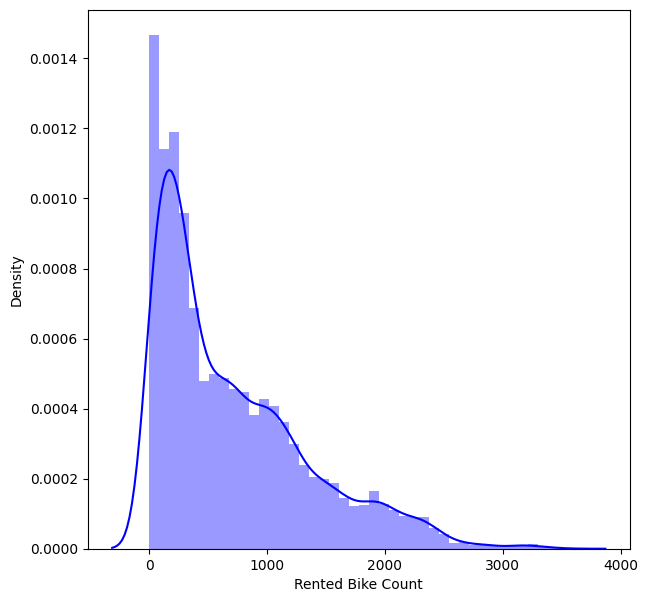

In [17]:
# Dependent variable 'Rented bike count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="b")


In [18]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew Point Temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12'],
      dtype='object')

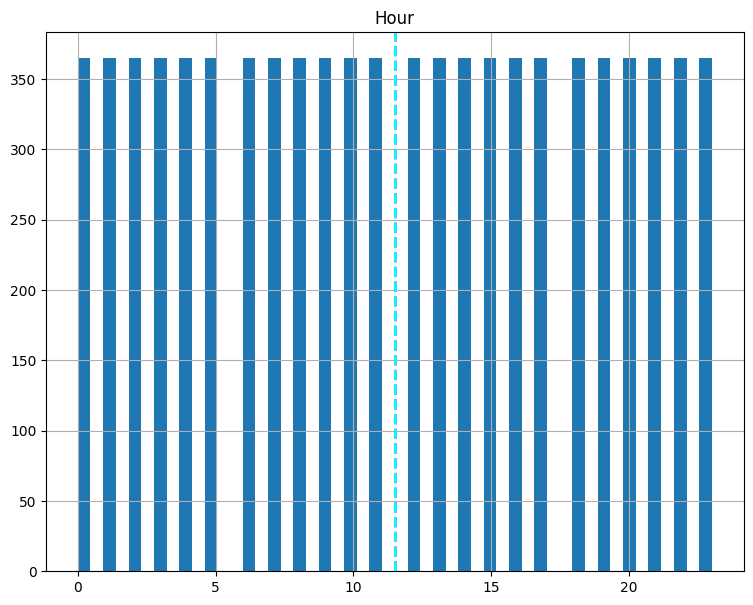

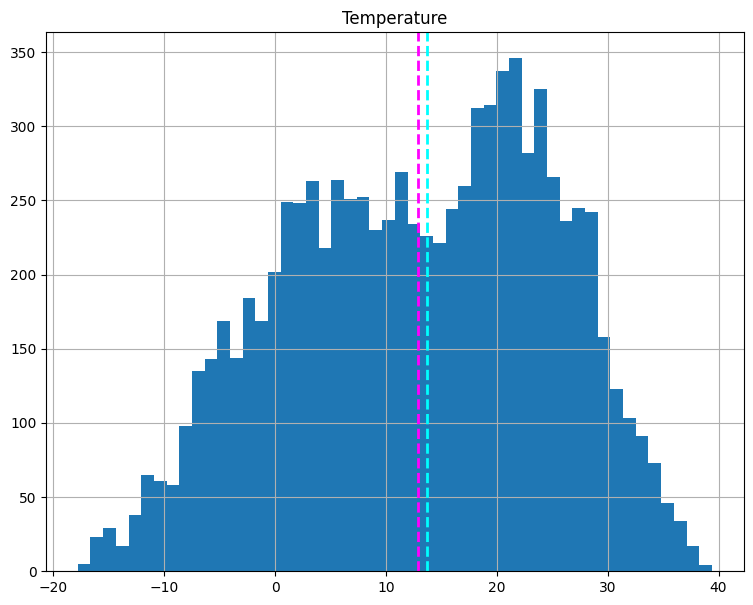

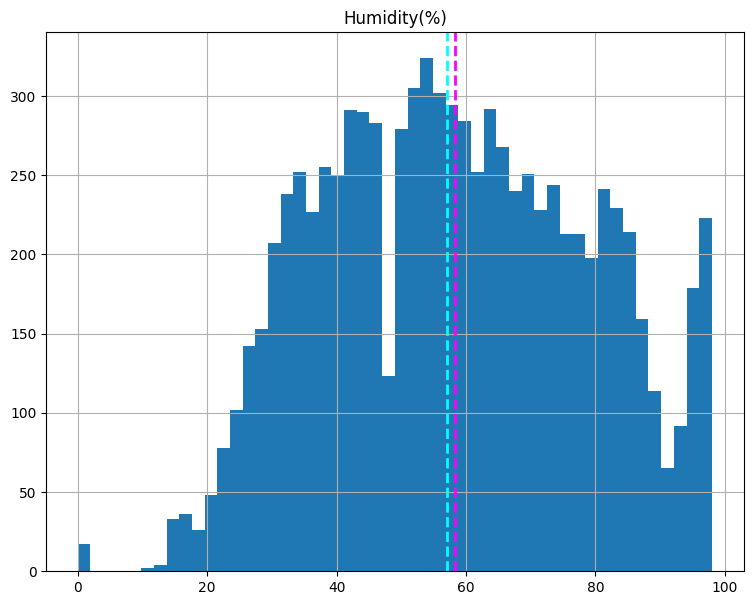

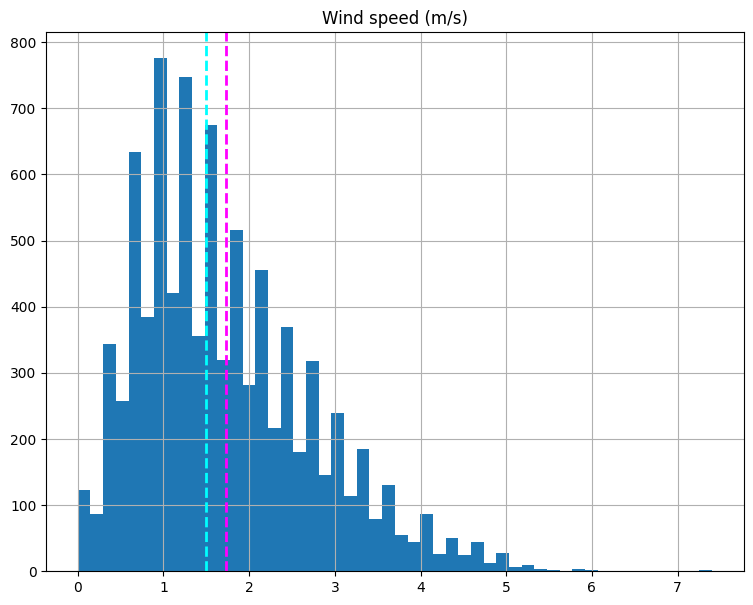

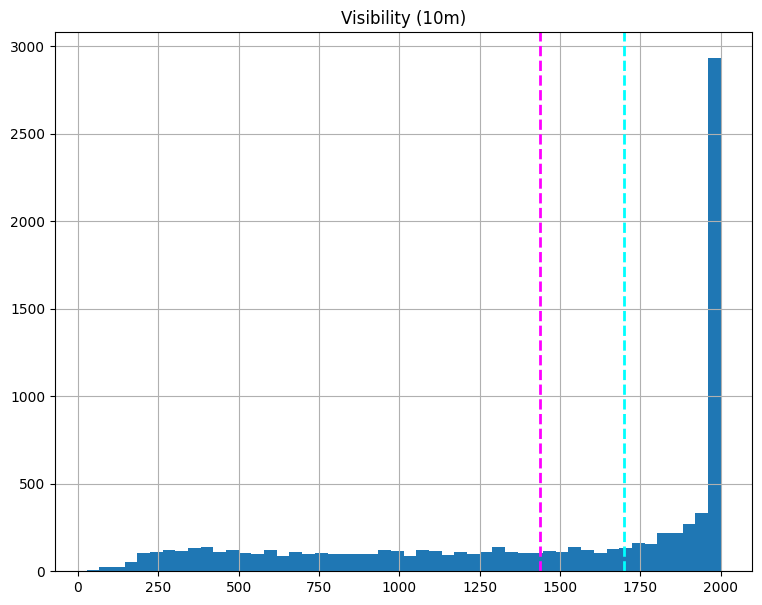

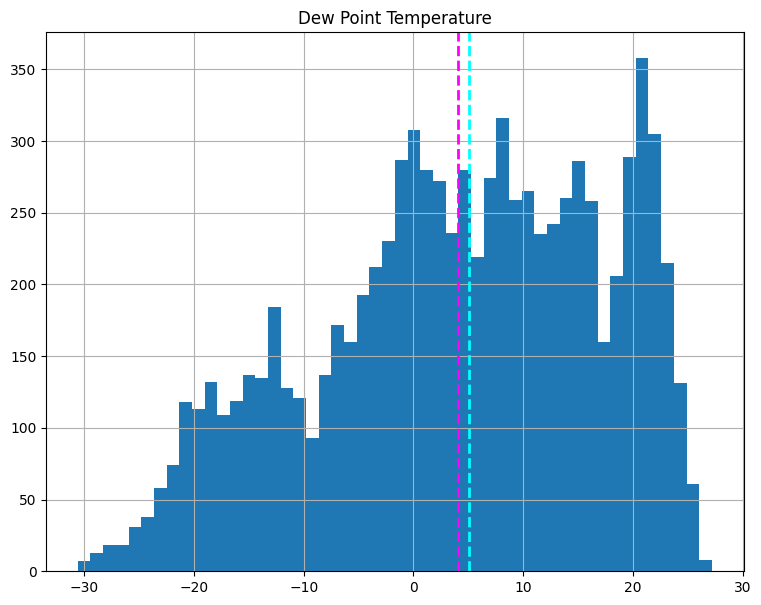

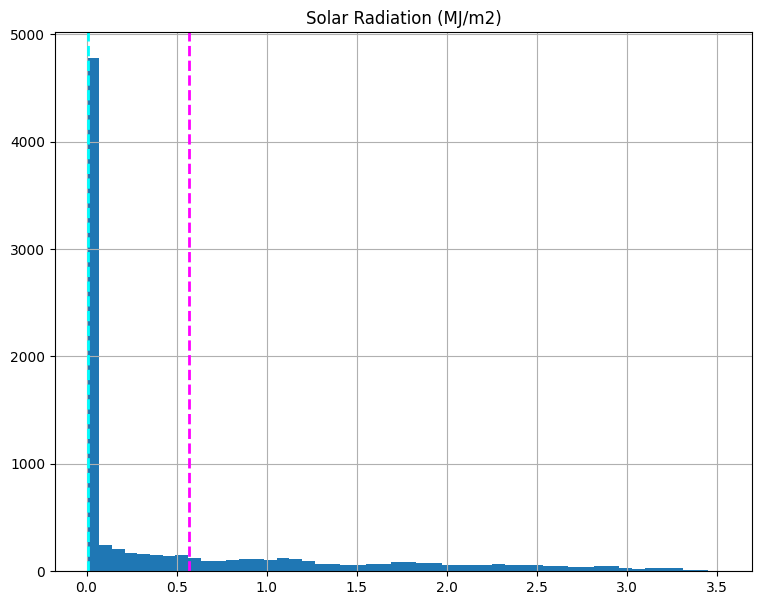

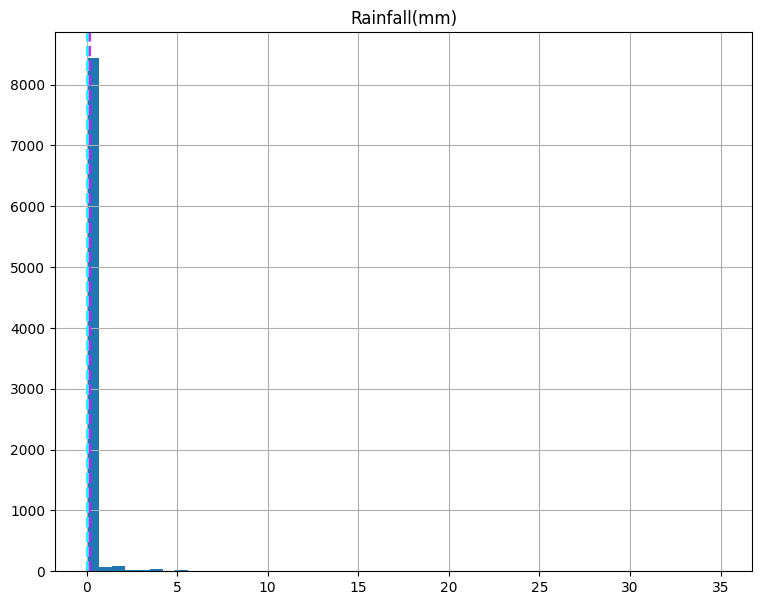

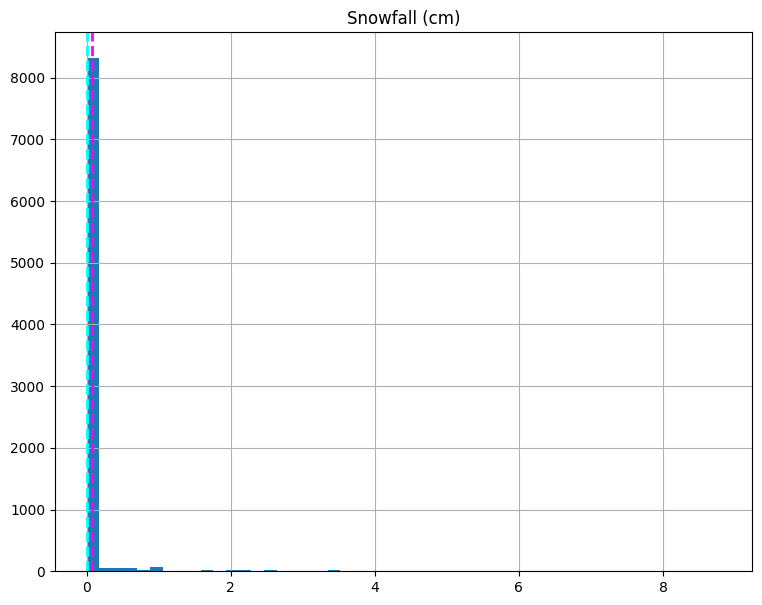

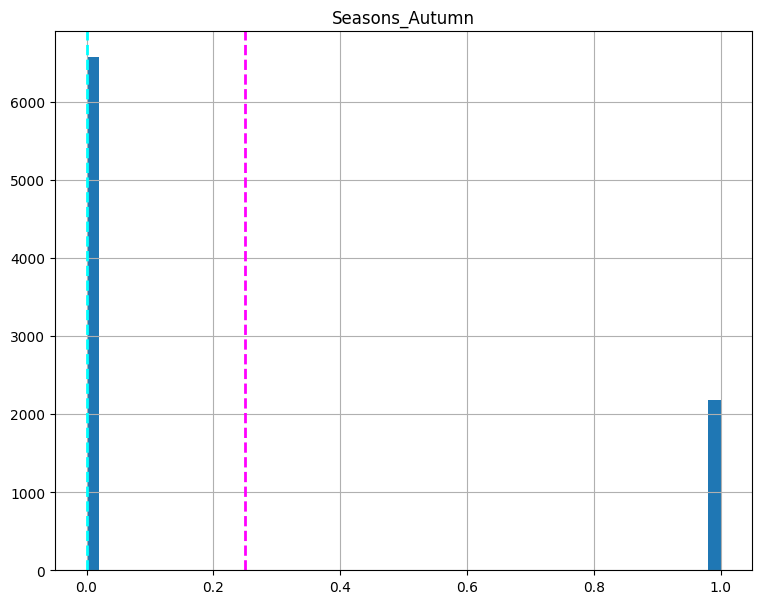

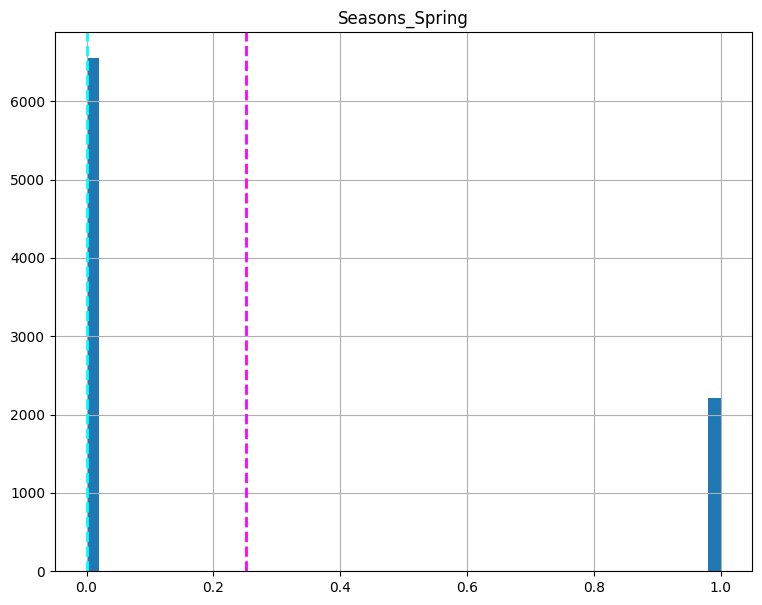

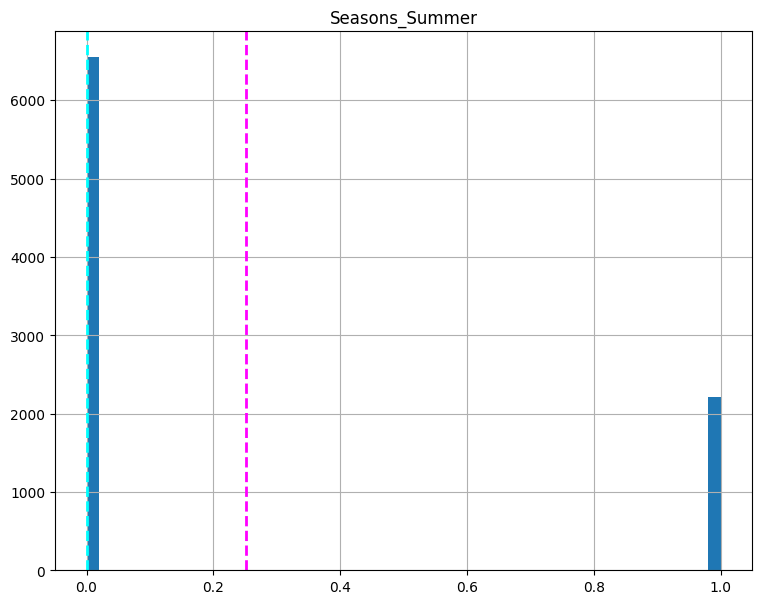

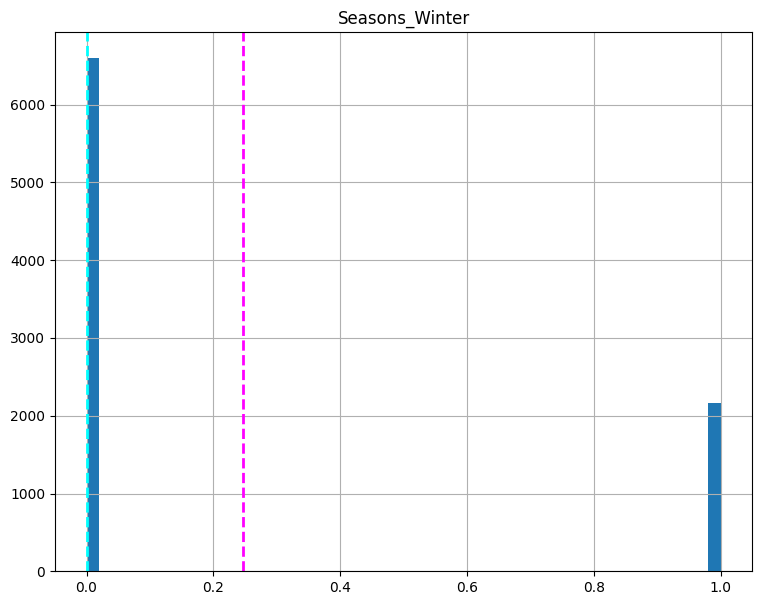

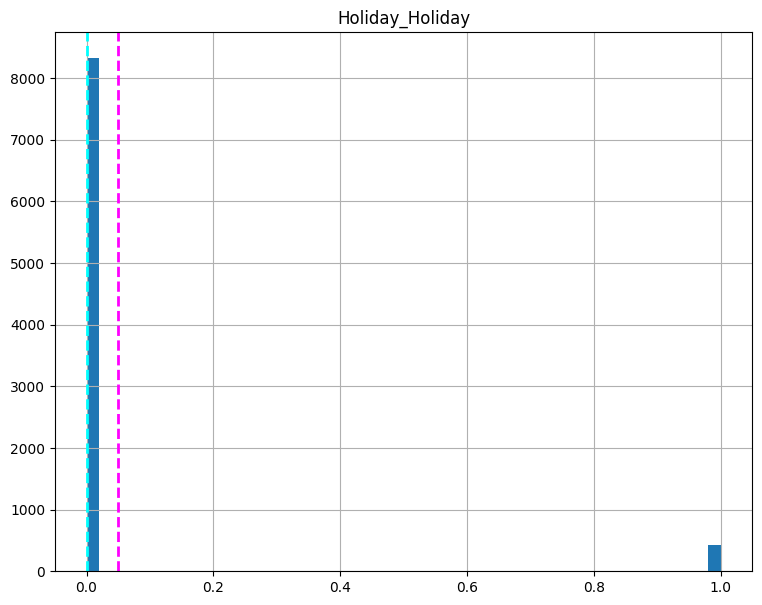

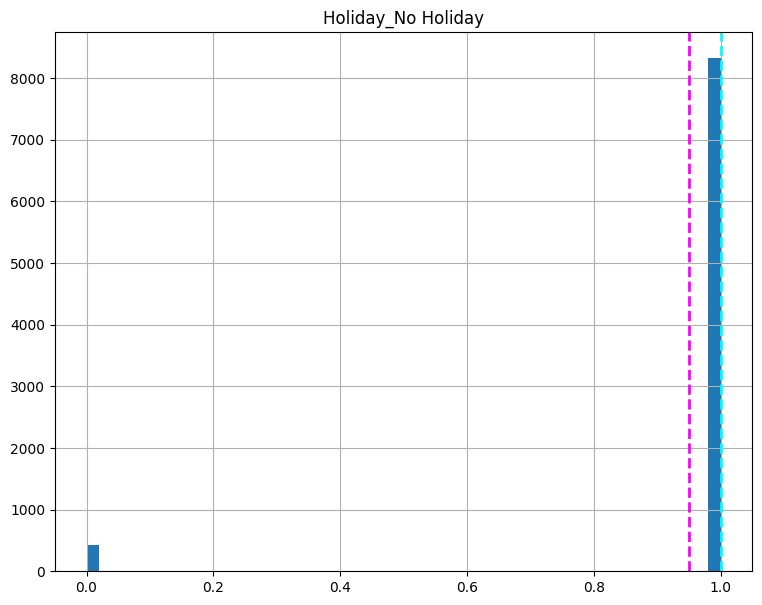

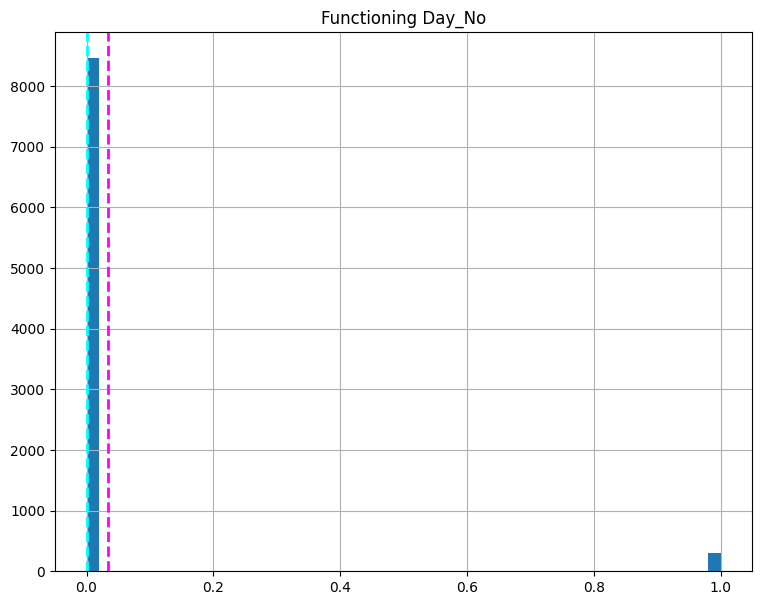

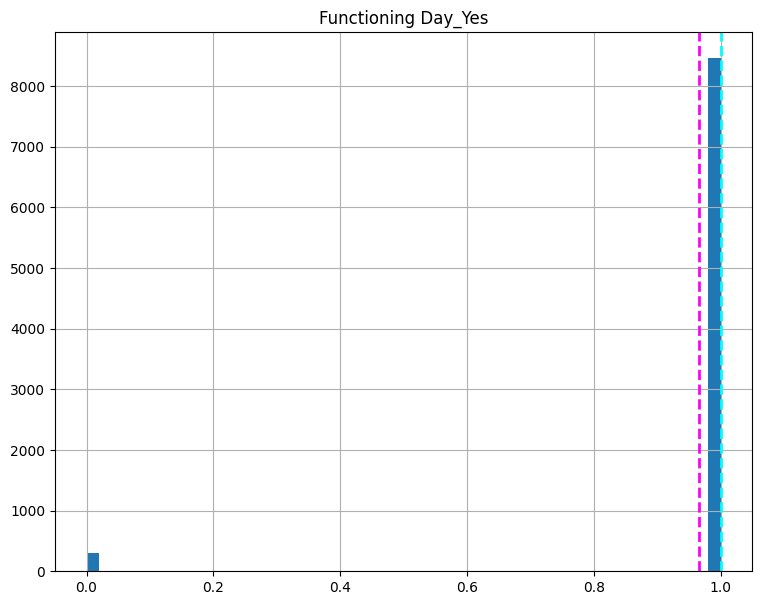

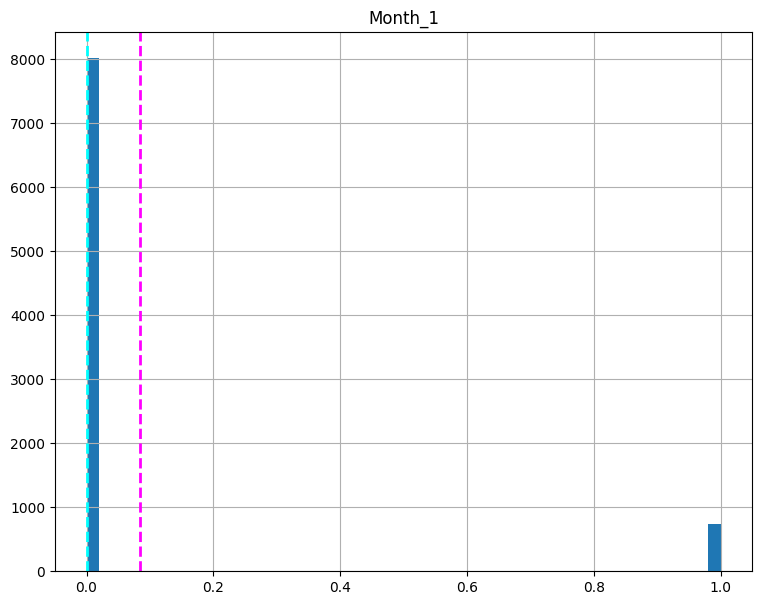

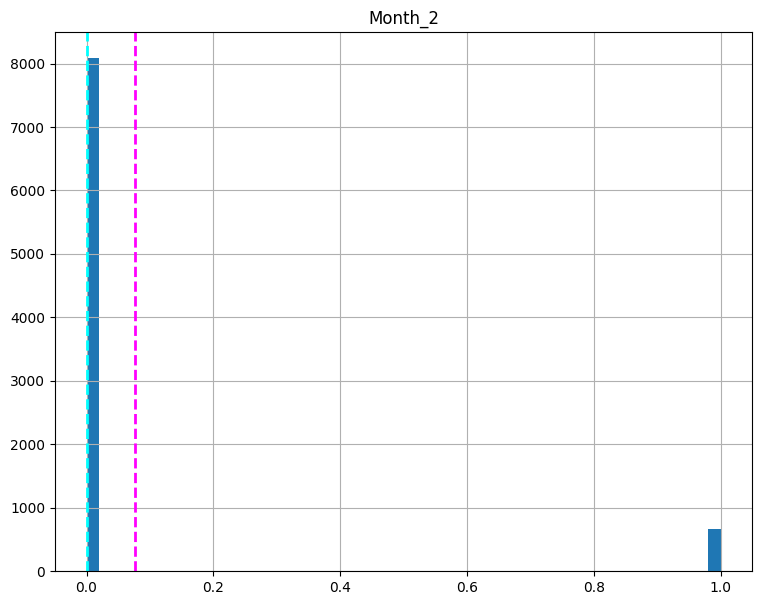

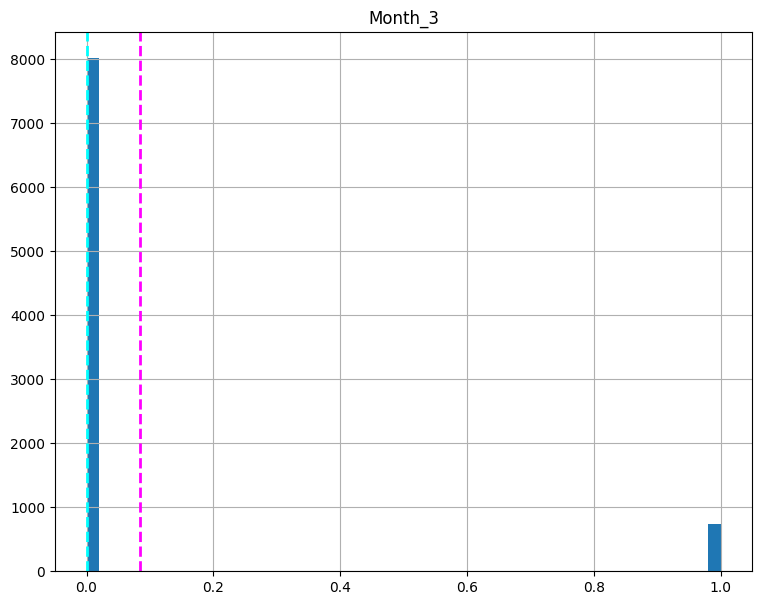

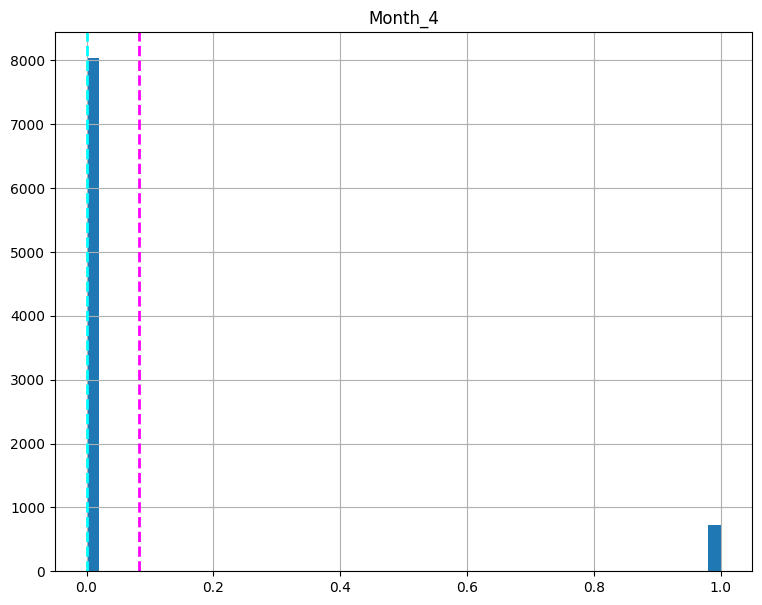

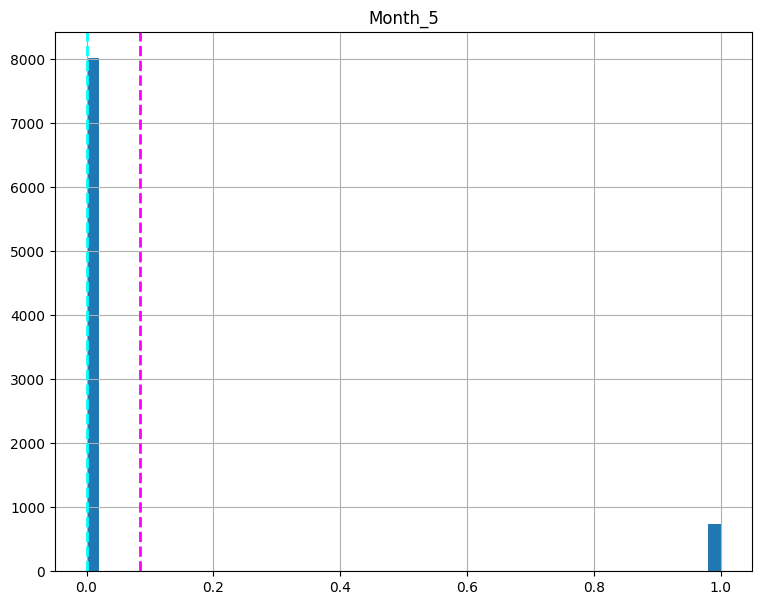

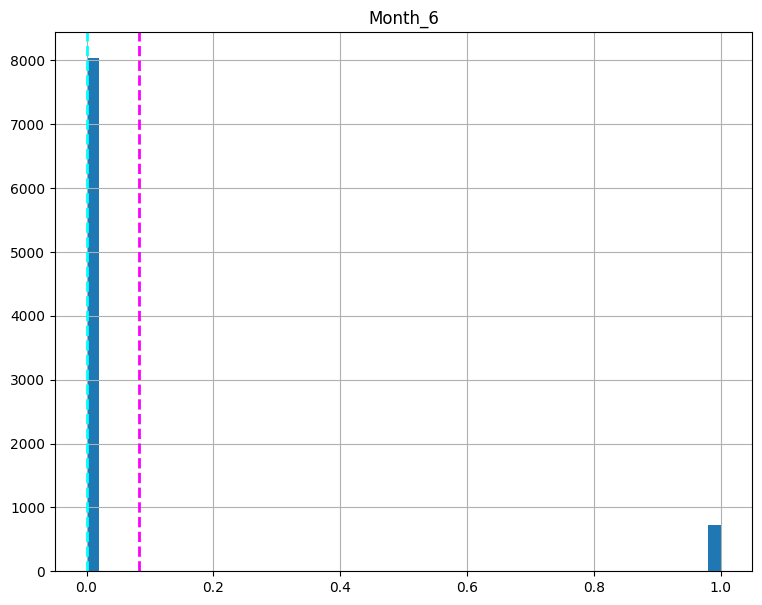

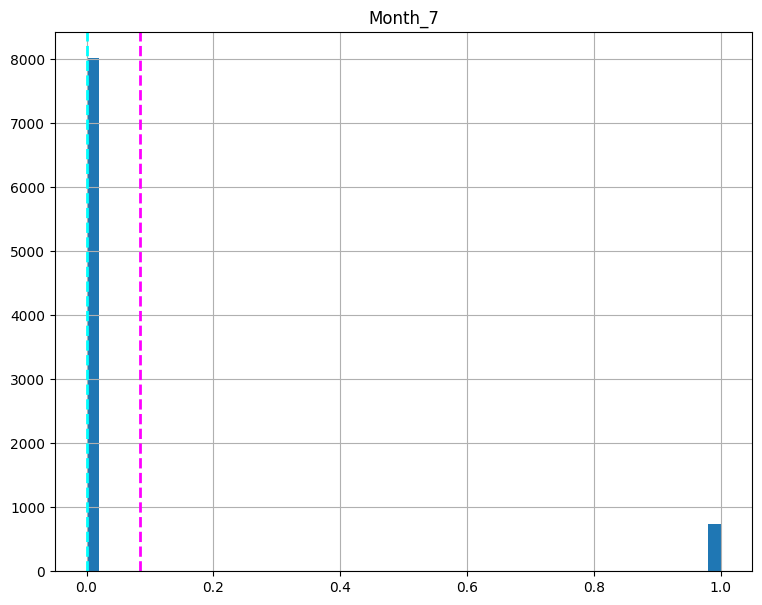

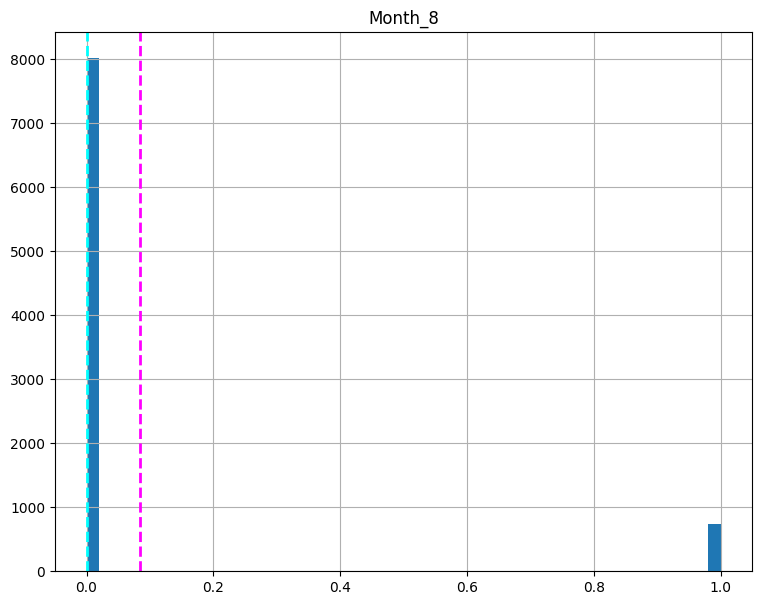

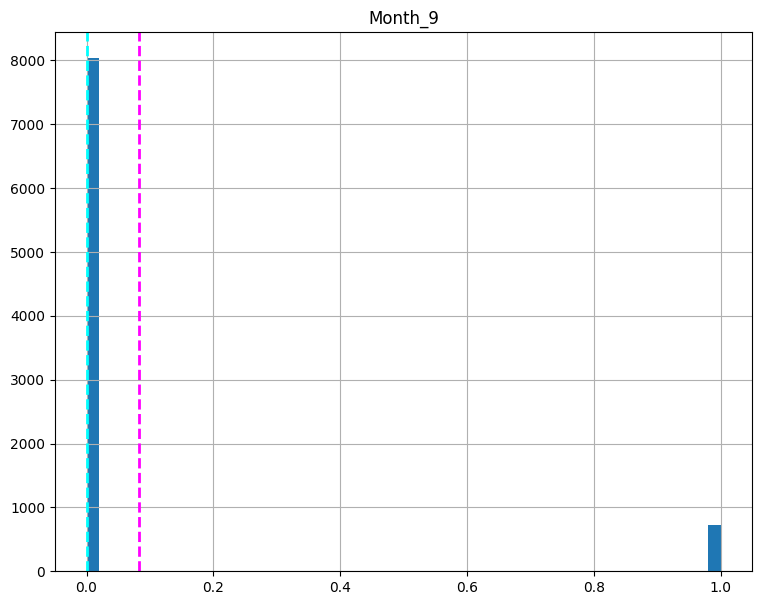

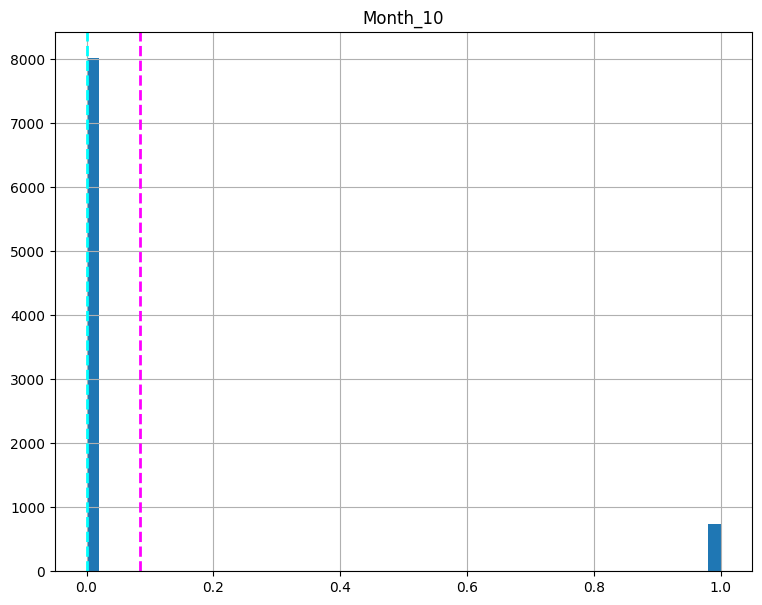

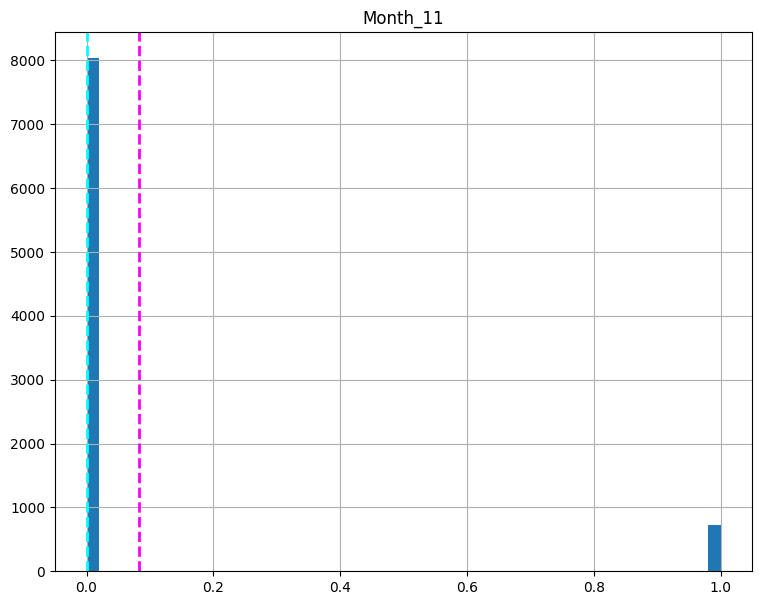

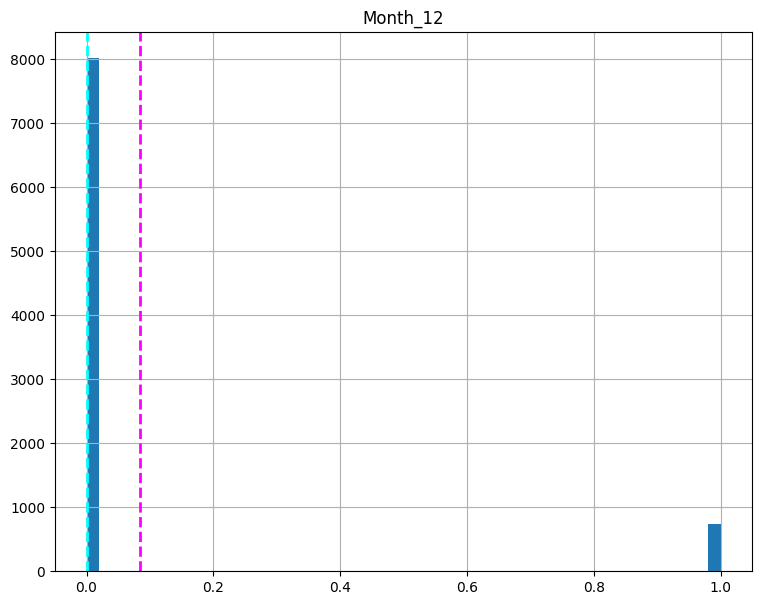

In [19]:
for col in numeric_features[1:]:
  fig=plt.figure(figsize=(9,7))
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()



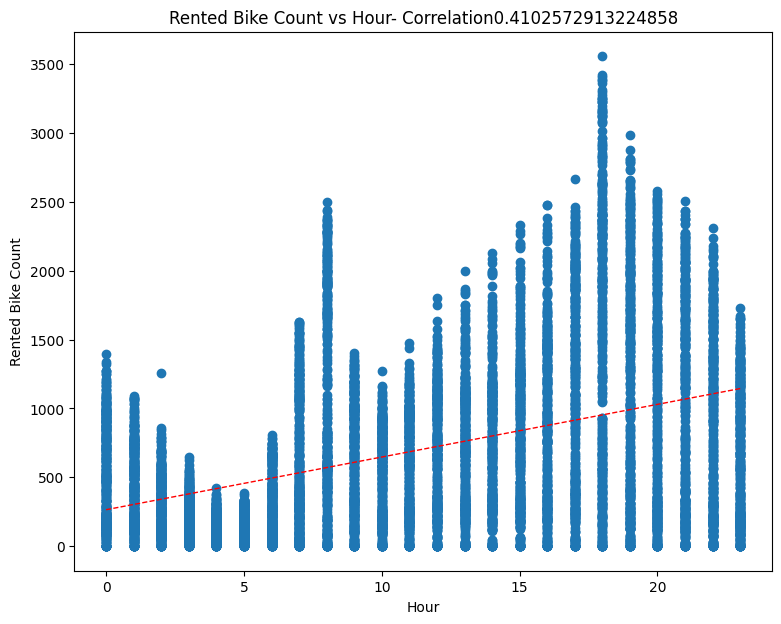

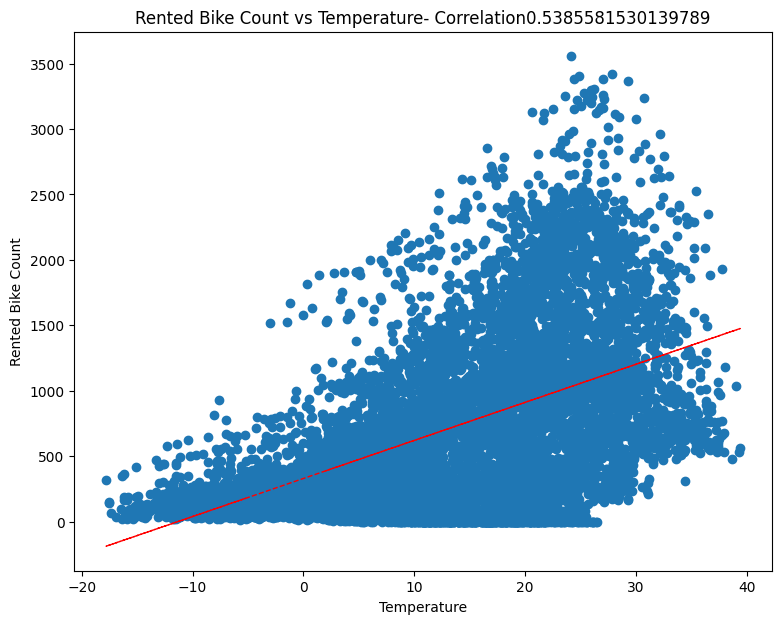

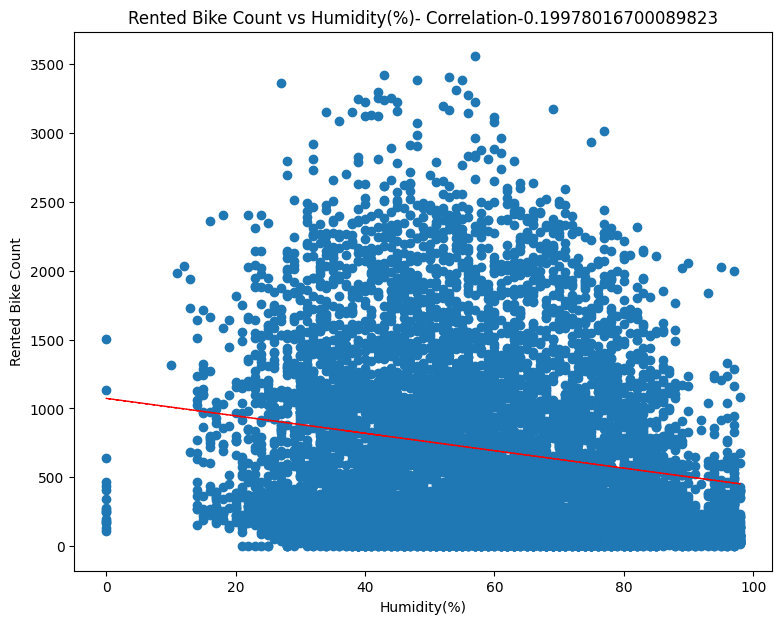

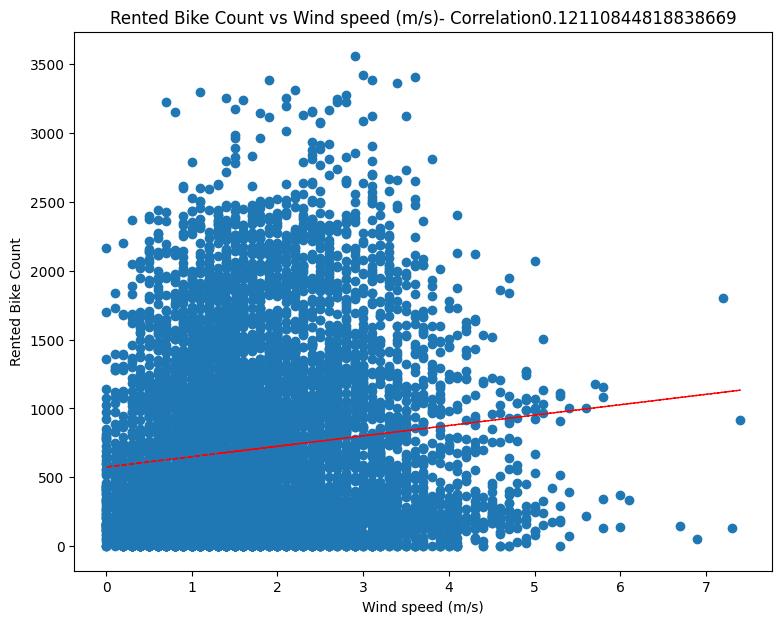

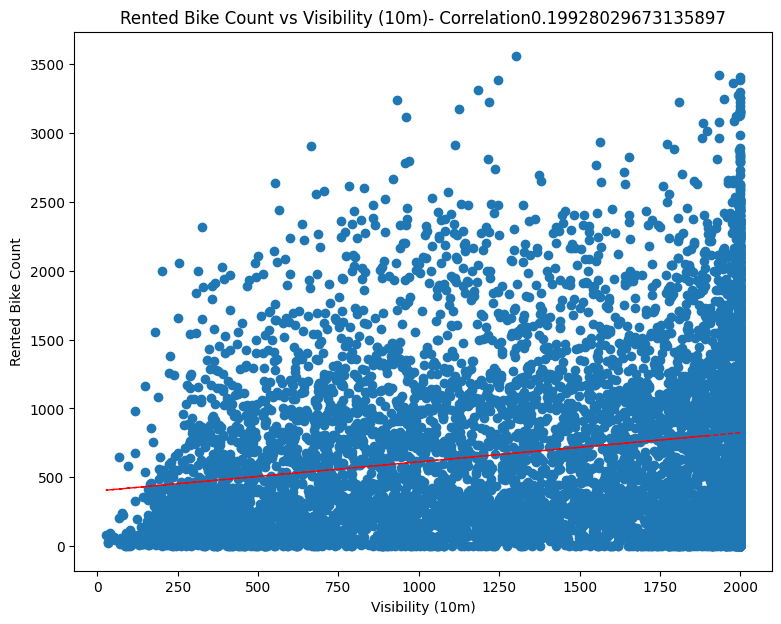

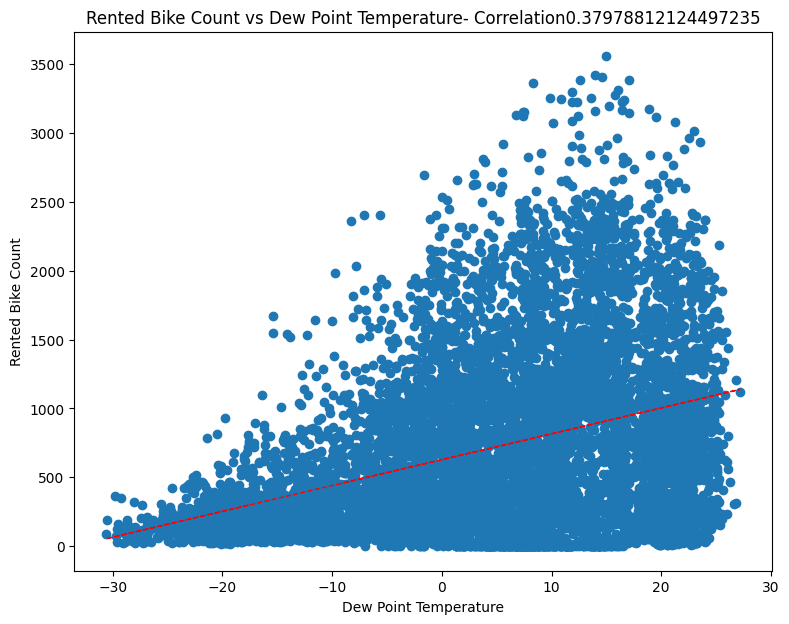

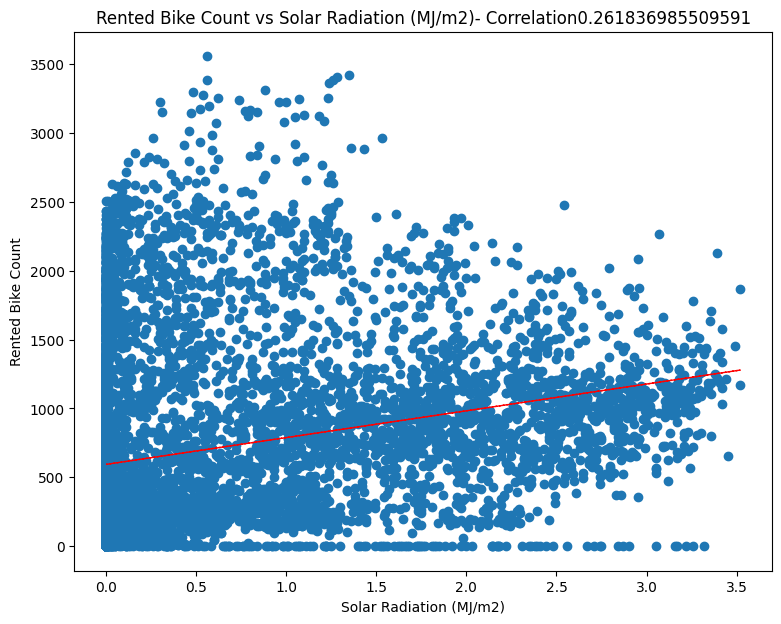

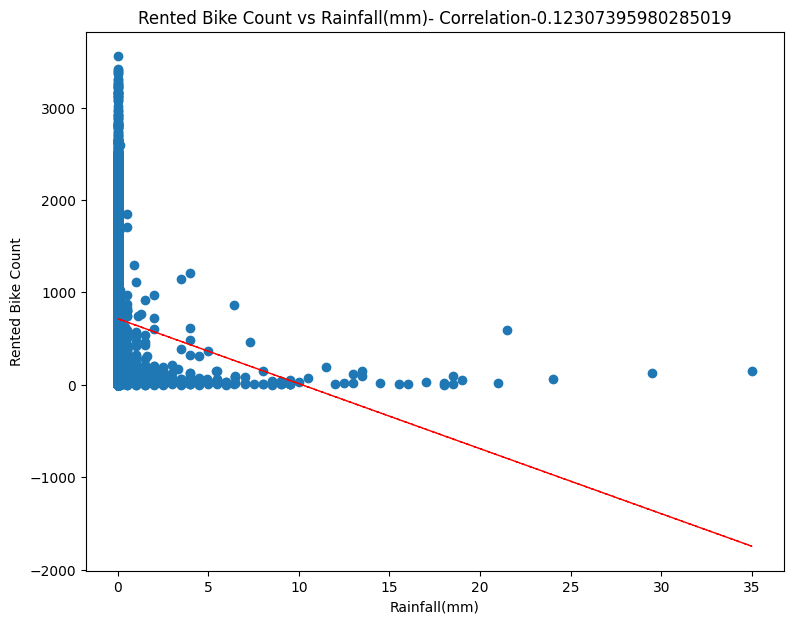

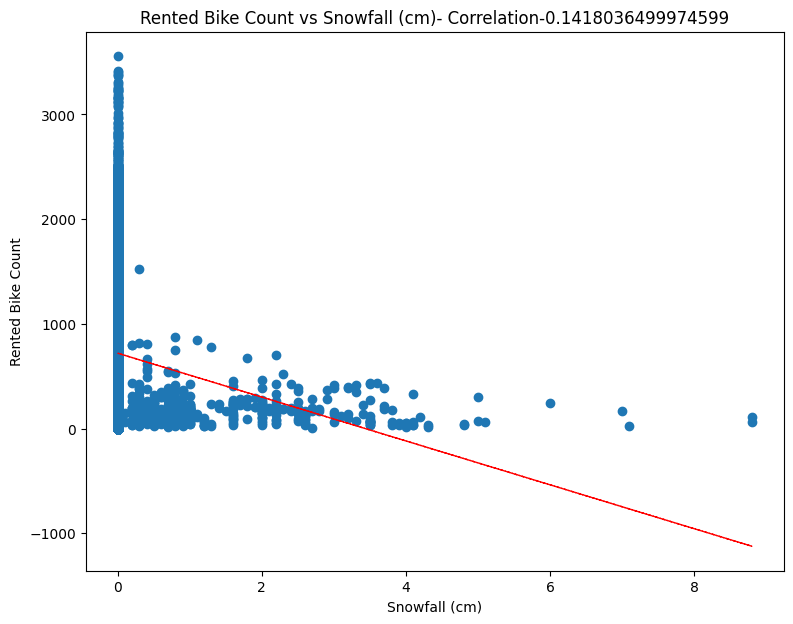

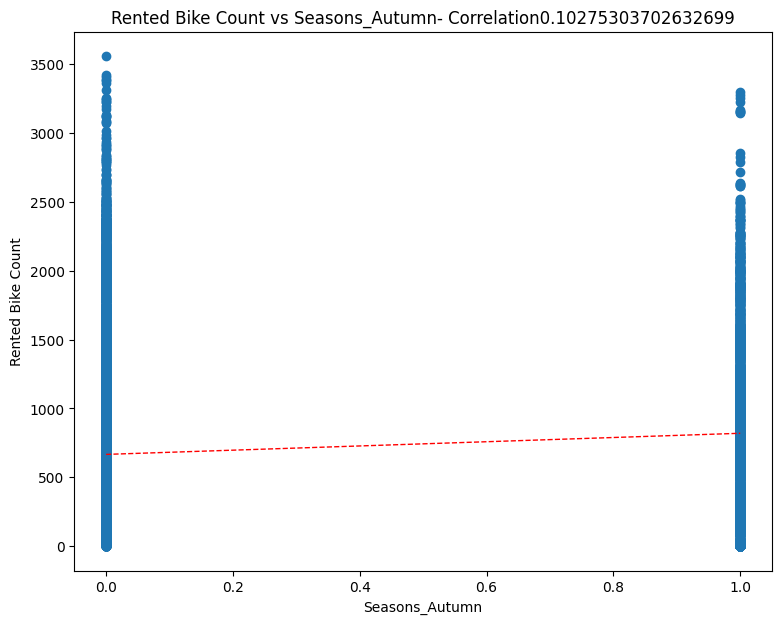

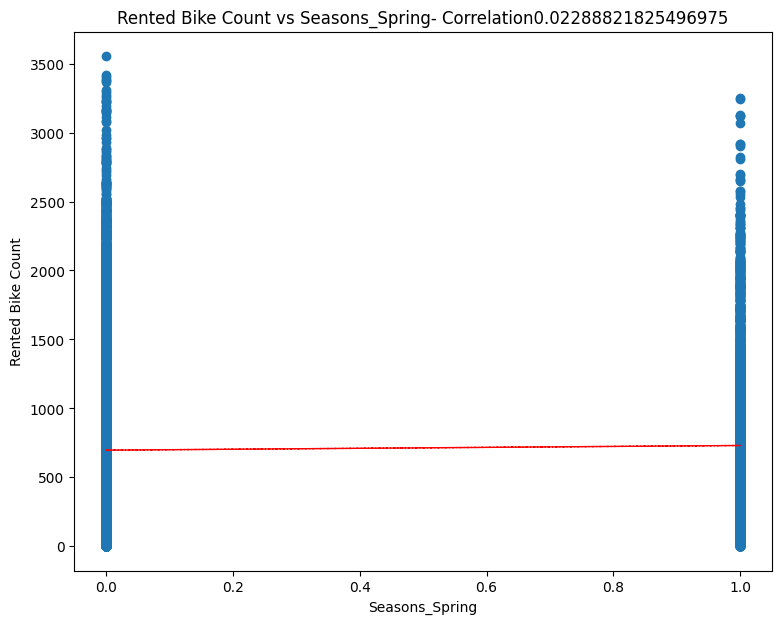

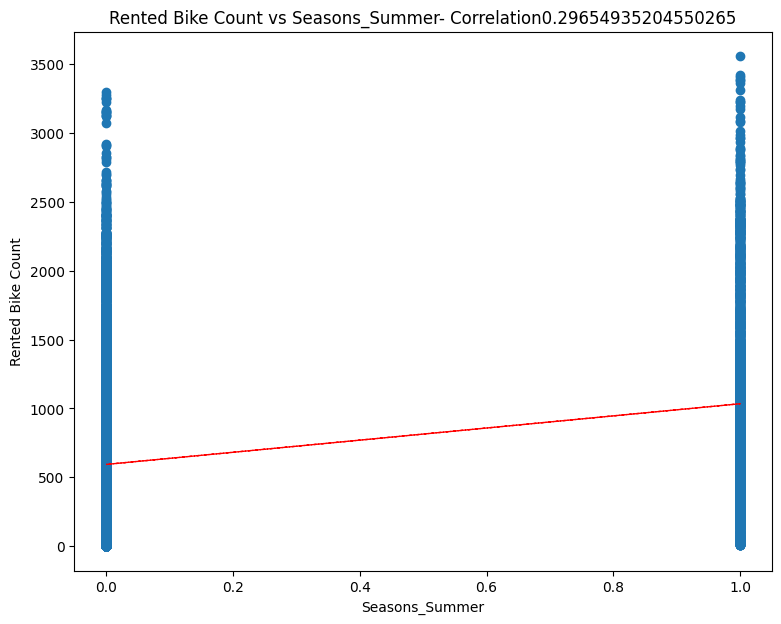

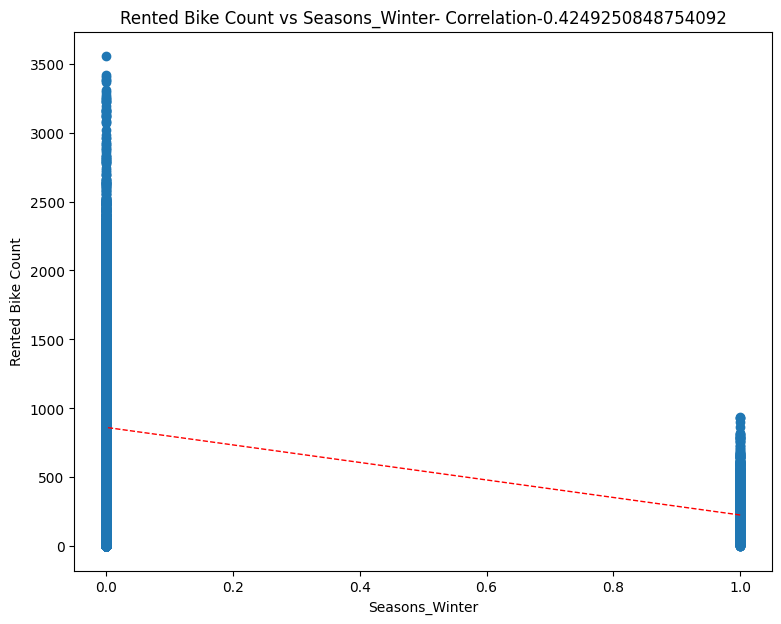

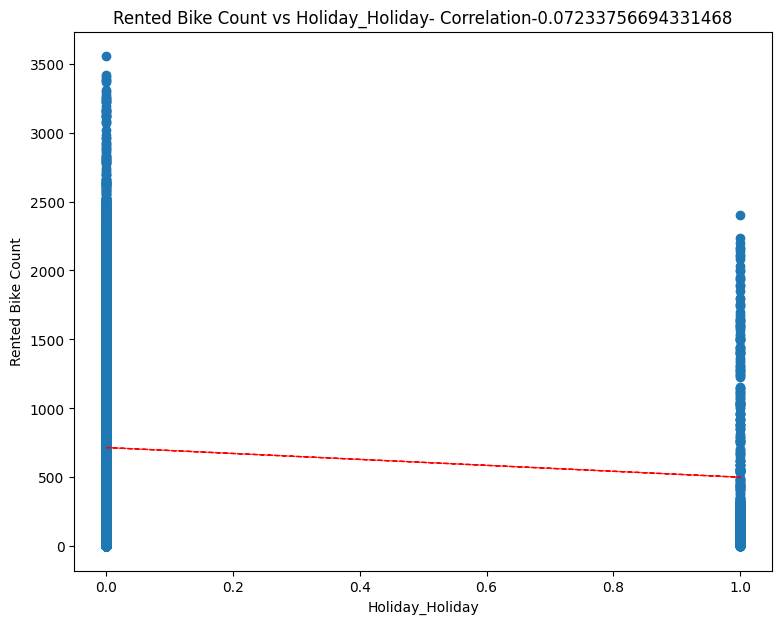

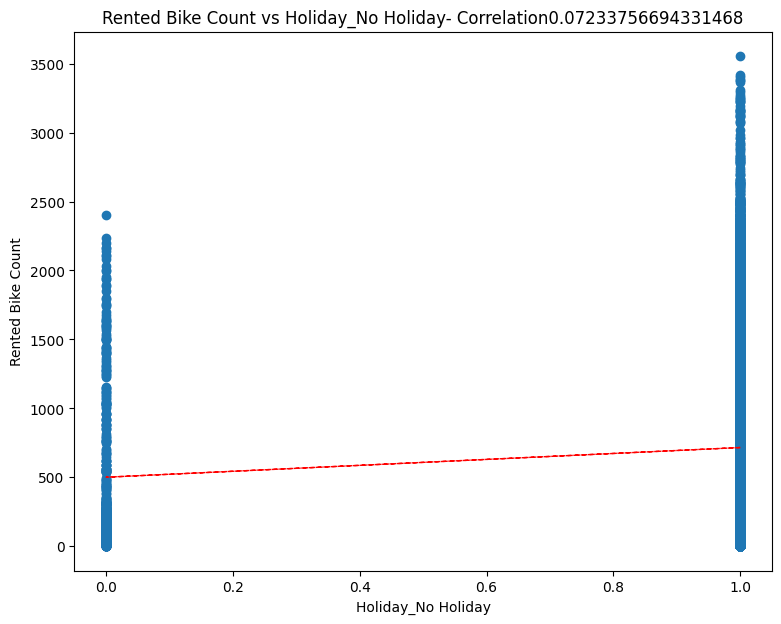

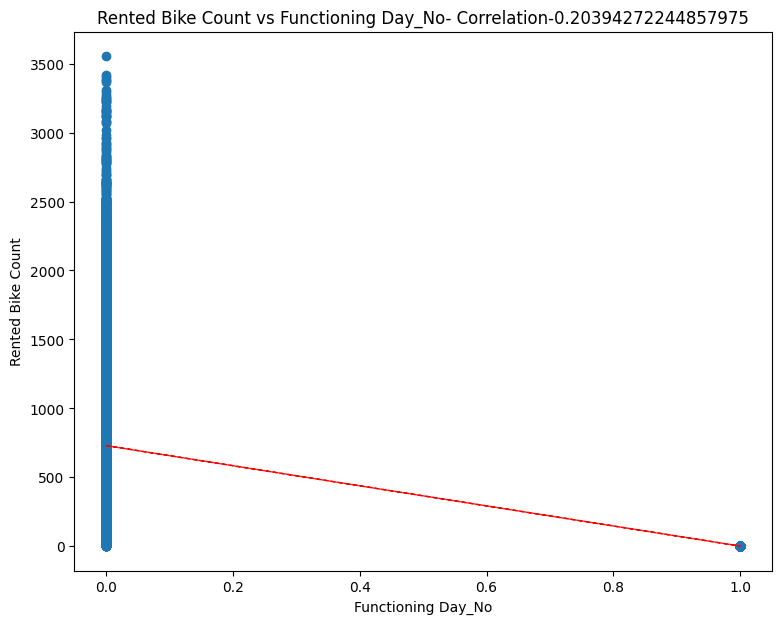

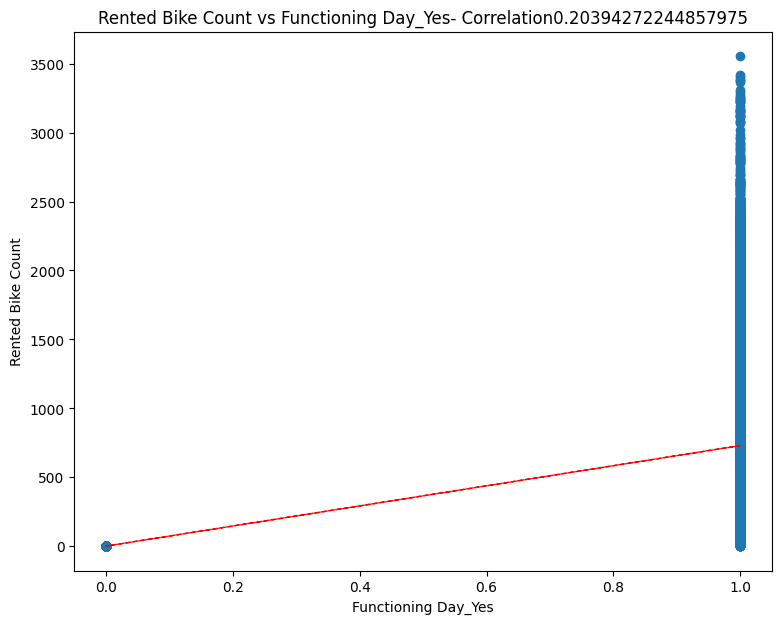

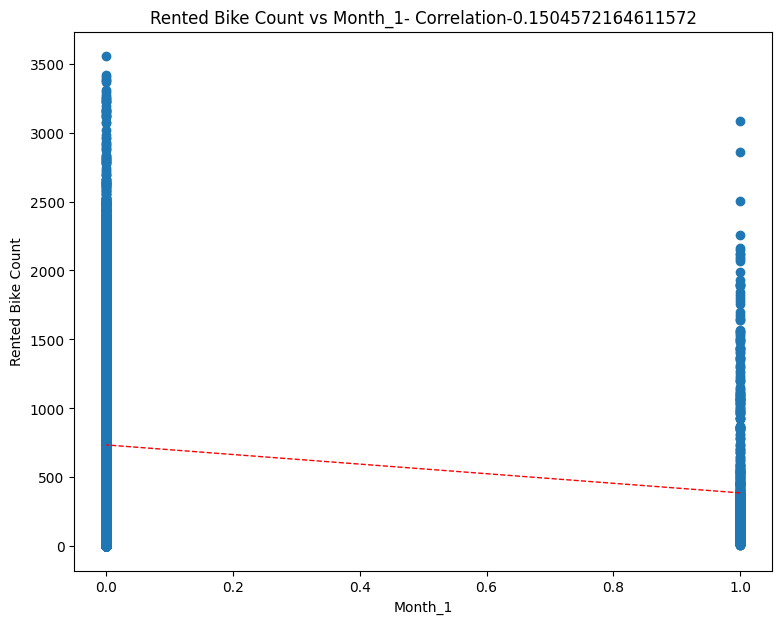

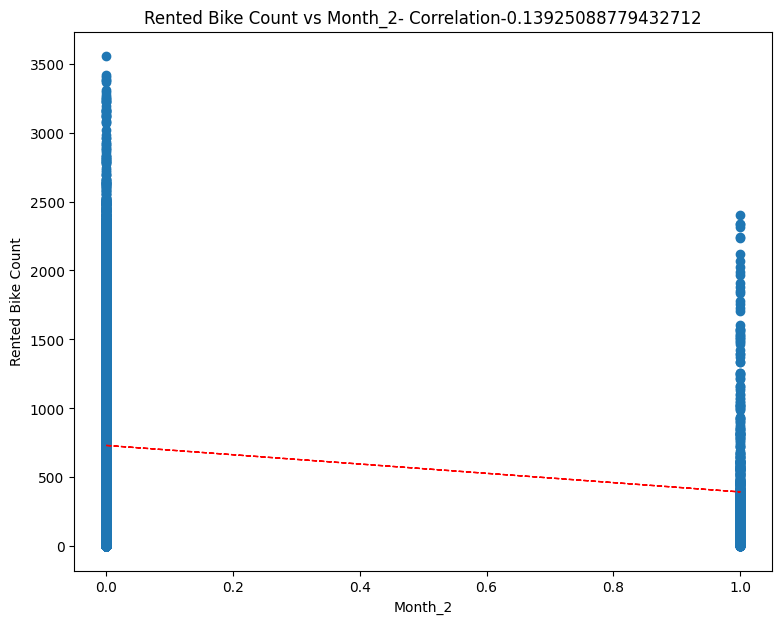

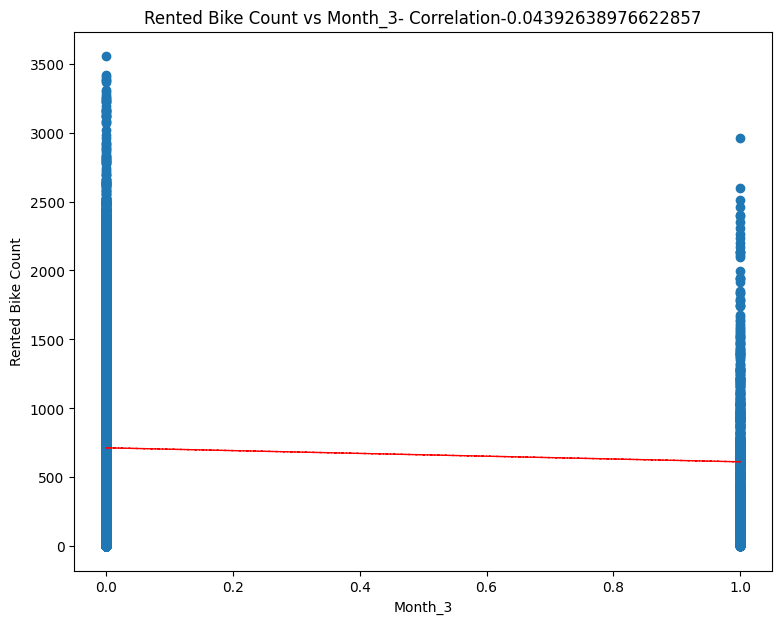

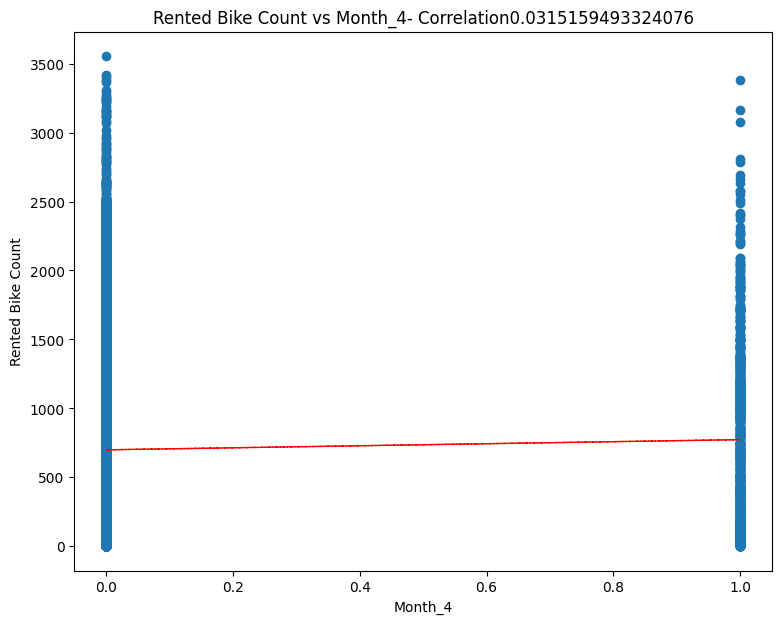

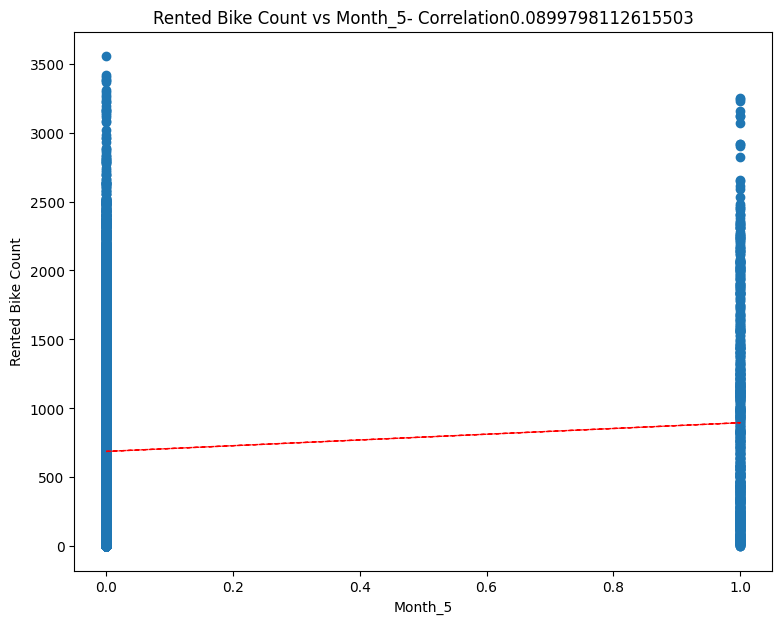

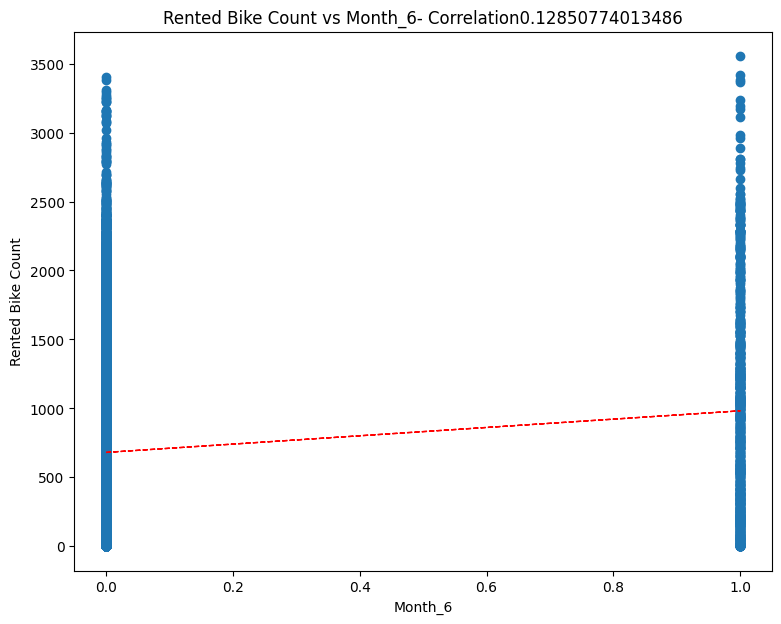

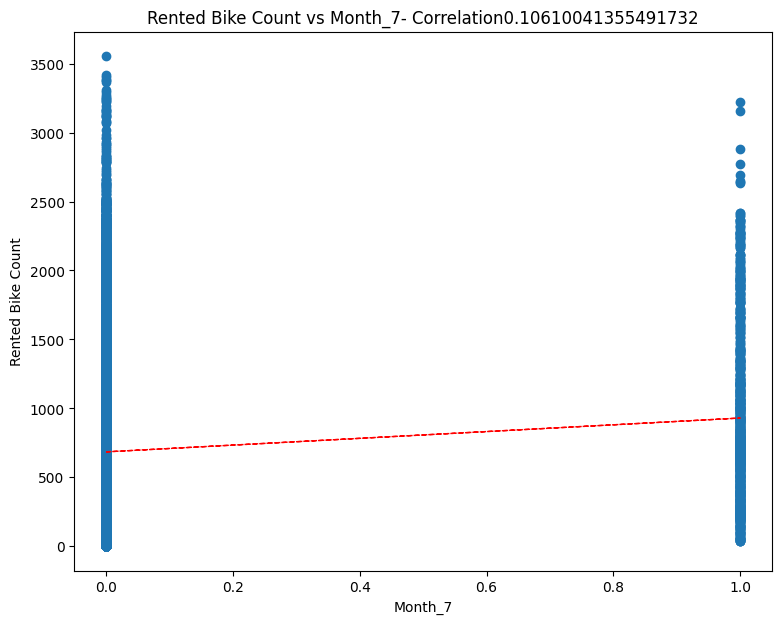

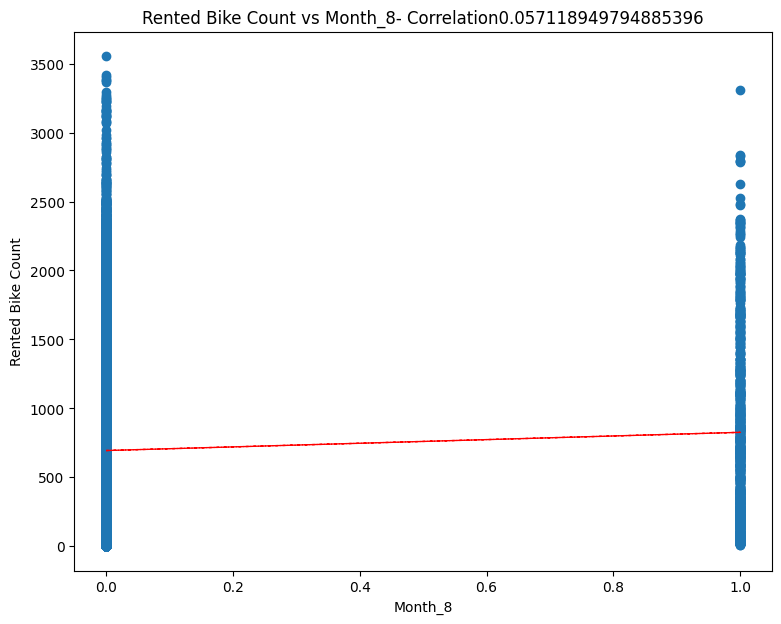

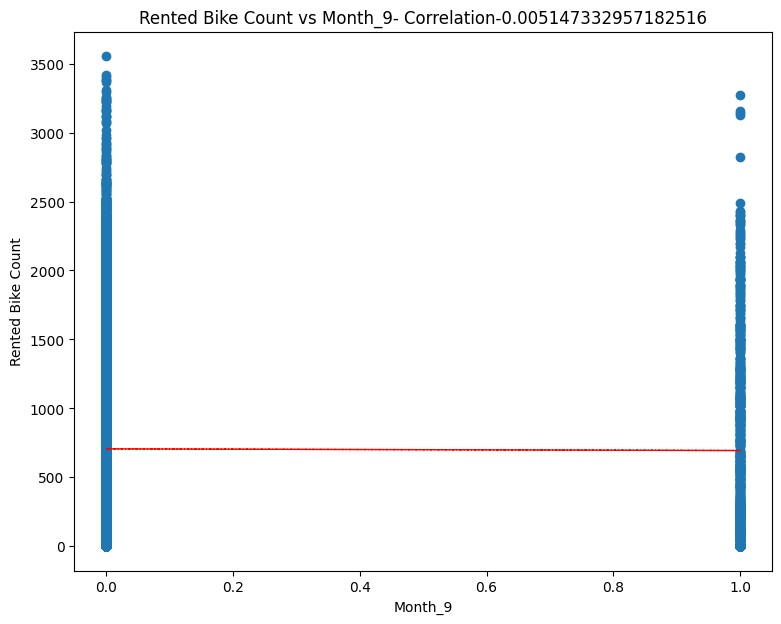

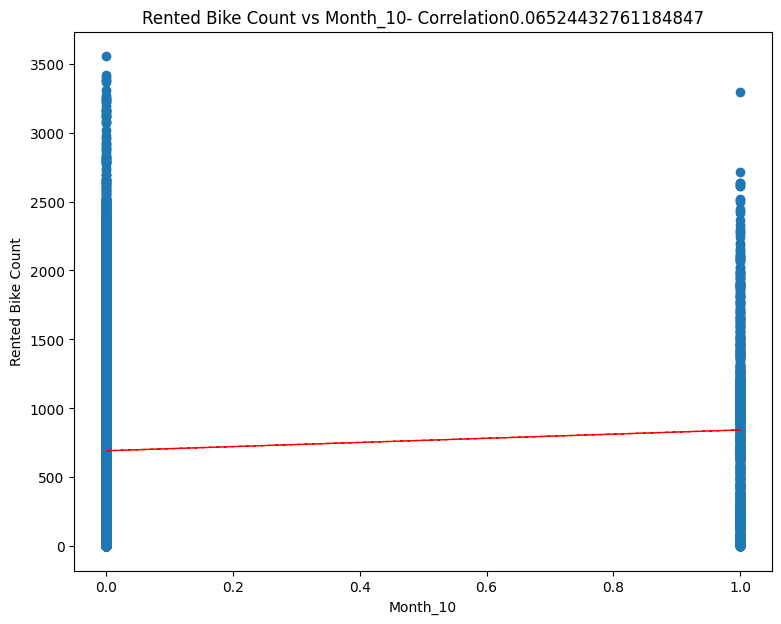

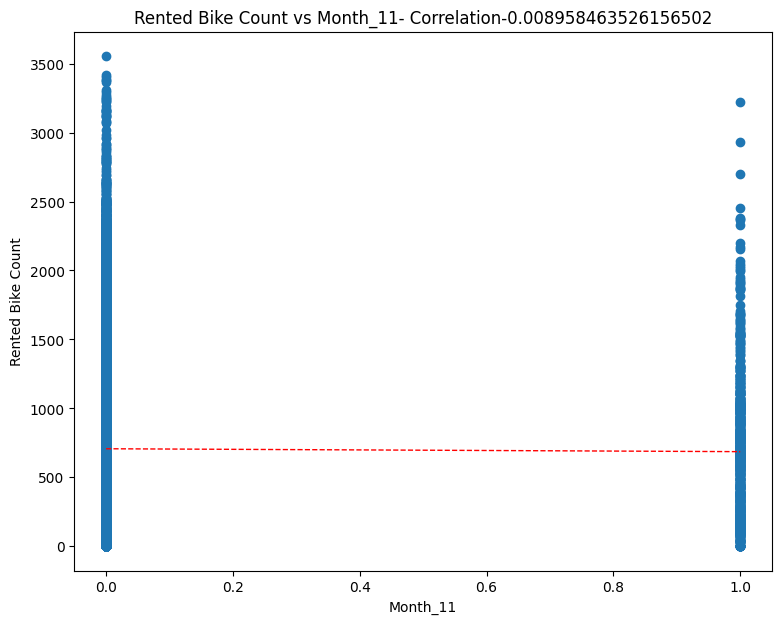

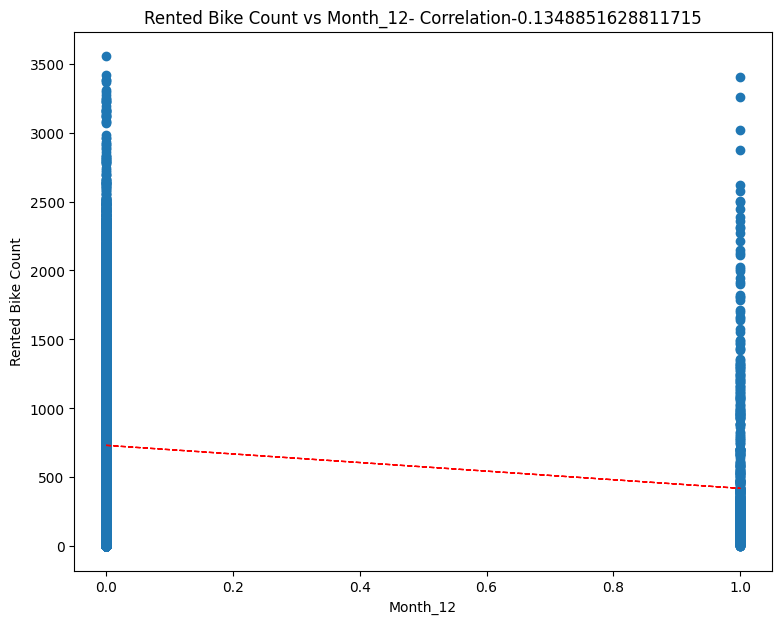

In [20]:
for col in numeric_features[1:]:
  fig=plt.figure(figsize=(9,7))
  ax=fig.gca()
  b=df[col]
  a=df['Rented Bike Count']
  correlation = b.corr(a)
  plt.scatter(x=b, y=a)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs ' +col +'- Correlation' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

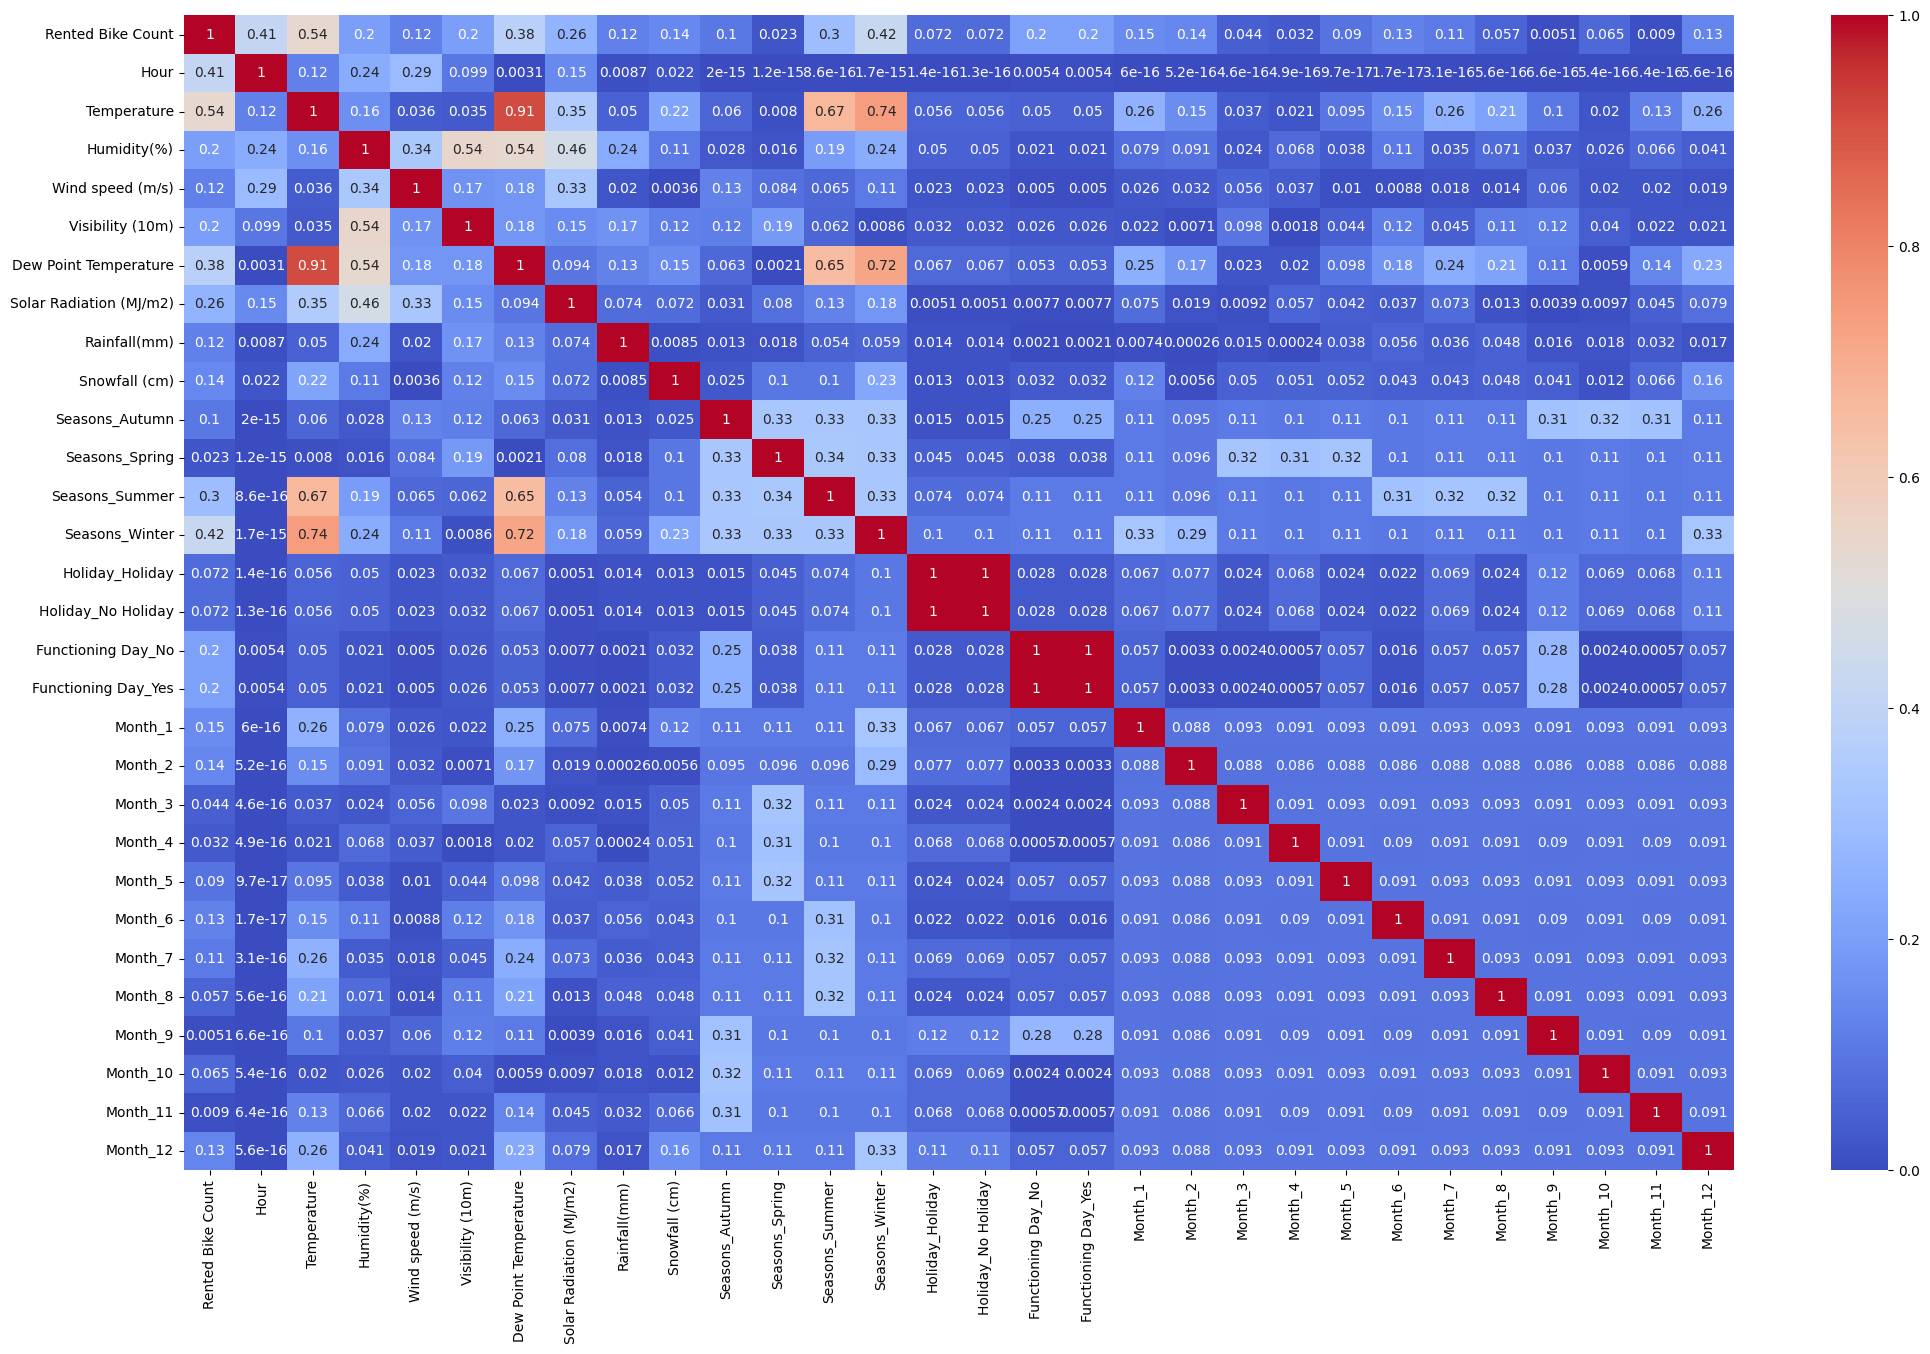

In [ ]:
plt.figure(figsize=(25,15))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Visualising the categorical variables

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)

sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Month', y='Rented Bike Count', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Holiday', y='Rented Bike Count', data=df)
plt.show()

## Insights
When the colinarity is checked, the columns 'Dew point temperature' and 'Temperature' are highly corelated, so its better to remove one among the column. The column 'Dew point temperature' can be hence dropped from the dataset.

In [21]:
#Dropping the dew point temperature column
df=df.drop('Dew Point Temperature', axis=1)

In [22]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,1.217986
1,Temperature,6.340896
2,Humidity(%),2.765000
3,Wind speed (m/s),1.312787
4,Visibility (10m),1.844600
5,Solar Radiation (MJ/m2),1.957802
6,Rainfall(mm),1.078828
7,Snowfall (cm),1.137903
8,Seasons_Autumn,inf
9,Seasons_Spring,inf


In [24]:
df= df.drop(columns={'Rainfall(mm)','Snowfall (cm)'})

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons_Autumn,Seasons_Spring,Seasons_Summer,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,0,-5.2,37,2.2,2000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Splitting into train and test

In [25]:
#Importing the train_test_split
from sklearn.model_selection import train_test_split

#Splitting the dataset into dependent and independendent variable(target variable) datasets
X=df.drop('Rented Bike Count', axis=1)
Y=df['Rented Bike Count']

#Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 26)
(1752, 26)


##Rescalling the features

In [26]:
#importing MinmaxScaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
Scaler=MinMaxScaler()

In [28]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12'],
      dtype='object')

In [29]:
#Creating the numerical values dataset
Numerical_features=['Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']

In [30]:
#Rescalling
X_train[Numerical_features]= Scaler.fit_transform(X_train[Numerical_features])
X_test[Numerical_features]= Scaler.fit_transform(X_test[Numerical_features])


## Model-1 Linear Regresssion

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
Regressor = LinearRegression().fit(X_train,Y_train)

In [33]:
Regressor.score(X_train, Y_train)

0.557311661748013

In [34]:
Regressor.coef_

array([  26.31618667, 1591.80799278, -838.2833169 ,  116.73153031,
         87.31081505, -309.25062128,  148.64585129,   32.10100665,
        -19.46545286, -161.28140507,  -58.19623118,   58.19623118,
       -467.20612864,  467.20612864,  -17.74027016,  -93.87709052,
        -49.77200509,  -13.17192108,   55.2367197 ,  223.56398827,
        -51.40747242, -105.10347414,  -25.52950996,   74.08765959,
        -25.2486346 ,   28.96201042])

In [35]:
Y_Predicted=Regressor.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

In [39]:
print(mean_squared_error(Y_test,Y_Predicted))

191437.19646774116


## Model-2 Lasso

In [41]:
#importing Lasso
from sklearn.linear_model import Lasso

In [59]:
from sklearn.model_selection import GridSearchCV
#implimenting cross validation and hyperparameter tuning
lasso = Lasso()
parameter= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model=GridSearchCV(lasso, parameter,cv=3)
lasso_model.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [60]:
print("The best parameter is ",lasso_model.best_params_)
print("The negative mean squared error using the parameter",lasso_model.best_params_,"is ",lasso_model.best_score_ )

The best parameter is  {'alpha': 0.1}
The negative mean squared error using the parameter {'alpha': 0.1} is  0.55358832322984


In [61]:
Y_lasso_predict=lasso_model.predict(X_test)
lasso_model.score(X_test,Y_test)

0.5426108923460873

In [62]:
Y_lasso_predict=lasso_model.predict(X_test)
print(mean_squared_error(Y_test,Y_lasso_predict))
lasso_model.score(X_train, Y_train)

191427.67326614368


0.5572957281426538

## Model-3 Ridge Model

In [49]:
from sklearn.linear_model import Ridge

In [63]:
ridge=Ridge()
parameter= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model=GridSearchCV(ridge, parameter,cv=3)
ridge_model.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [64]:
ridge_model.score(X_train, Y_train)

0.5573114403712671

## Model-4 Decision Tree